In [1]:
from __future__ import print_function

import SimpleITK as sitk
import sys, os
import numpy as np

import matplotlib.pyplot as plt

In [2]:
%pylab inline
#plt.ion()

Populating the interactive namespace from numpy and matplotlib


In [3]:
tempDataDir = '/Users/kayhan/Downloads/406/DICOM/ST00001'

In [121]:
for fn in ['SE00001','SE00002','SE00003','SE00004','SE00005','SE00006']:
    print( "Reading Dicom directory:", tempDataDir )
    reader = sitk.ImageSeriesReader()

    dicom_names = reader.GetGDCMSeriesFileNames( tempDataDir + '/' + fn )
    reader.SetFileNames(dicom_names)

    image = reader.Execute()

    size = image.GetSize()
    dims = image.GetSpacing()
    print( "Image size:", size[0], size[1], size[2] )
    print( "Image dims:", dims[0], dims[1], dims[2] )

    print( "Writing image:", tempDataDir + '/' + fn + '.nii' )

    sitk.WriteImage( image, tempDataDir + '/' + fn + '.nii' )

#if ( not "SITK_NOSHOW" in os.environ ):
#    sitk.Show( image, "Dicom Series" )

Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 256 256 4
Image dims: 1.4844 1.4844 10.0
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00001.nii
Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 512 512 4
Image dims: 0.7813 0.7813 9.199996948242188
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00002.nii
Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 512 512 4
Image dims: 0.7813 0.7813 9.199996948242188
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00003.nii
Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 256 256 4
Image dims: 1.4844 1.4844 9.0
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00004.nii
Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 256 256 4
Image dims: 1.4844 1.4844 11.0
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00005.nii
Reading Dicom directory: /User

# Visualization of the images

/Users/kayhan/anaconda2/envs/py36Torch/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


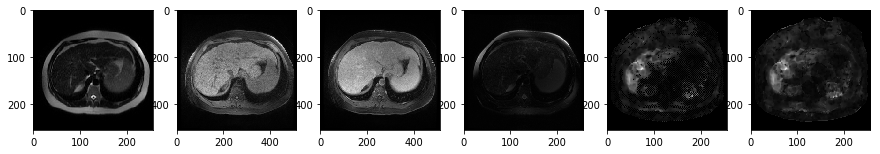

In [5]:
figure(figsize=(15,75))
subplot(1,6,1)
cnt = 0
for fn in ['SE00001','SE00002','SE00003','SE00004','SE00005','SE00006']:
    cnt = cnt + 1
    subplot(1,6,cnt)
    img = sitk.ReadImage(tempDataDir + '/' + fn + '.nii')
    IMG = sitk.GetArrayFromImage(img)

    imshow(IMG[0,:,:],cmap='gray')

In [6]:
for subj in ['396','399','402','403','404','405','406']:
    tempDataDir = '/Users/kayhan/Downloads/%s/DICOM/ST00001'%subj
    for fn in ['SE00001','SE00002','SE00003','SE00004','SE00005','SE00006']:
        print( "Reading Dicom directory:", tempDataDir )
        reader = sitk.ImageSeriesReader()

        dicom_names = reader.GetGDCMSeriesFileNames( tempDataDir + '/' + fn )
        reader.SetFileNames(dicom_names)

        image = reader.Execute()

        size = image.GetSize()
        print( "Image size:", size[0], size[1], size[2] )

        print( "Writing image:", tempDataDir + '/' + fn + '.nii' )

        sitk.WriteImage( image, tempDataDir + '/' + fn + '.nii' )

Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 256 256 4
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00001.nii
Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 512 512 4
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00002.nii
Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 512 512 4
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00003.nii
Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 256 256 4
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00004.nii
Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 256 256 4
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00005.nii
Reading Dicom directory: /Users/kayhan/Downloads/396/DICOM/ST00001
Image size: 256 256 4
Writing image: /Users/kayhan/Downloads/396/DICOM/ST00001/SE00006.nii
Reading Dicom directory: /Users/kayhan/Downloads/399

/Users/kayhan/anaconda2/envs/py36Torch/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


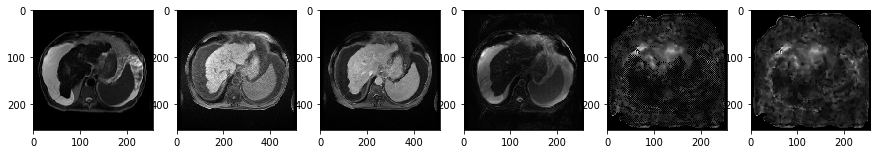

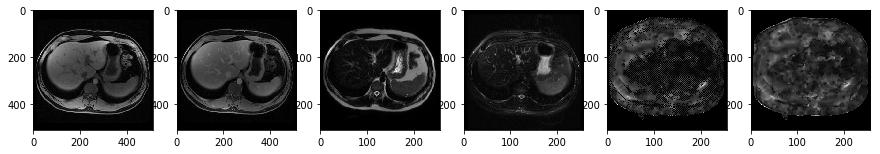

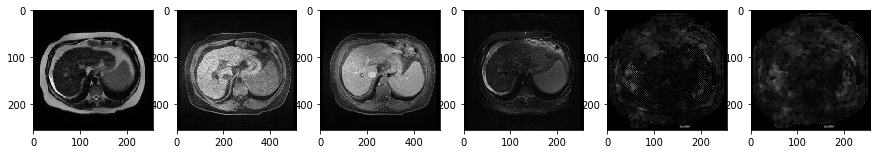

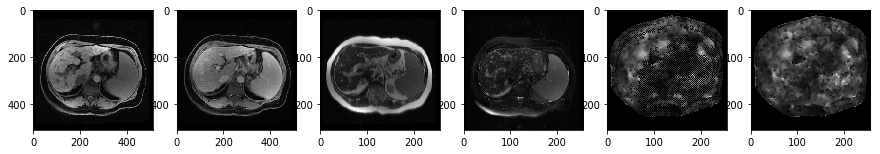

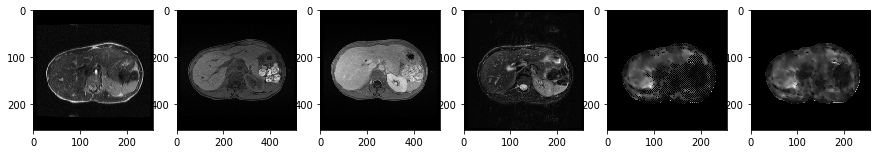

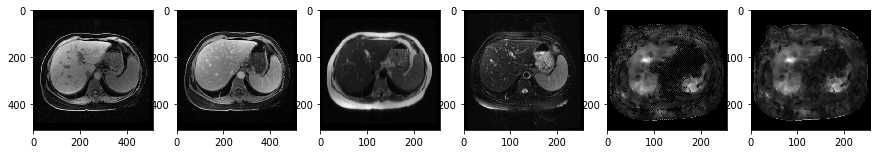

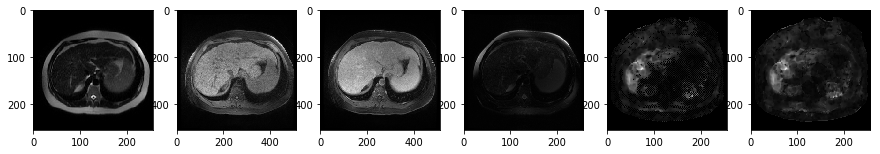

In [17]:
for subj in ['396','399','402','403','404','405','406']:
    tempDataDir = '/Users/kayhan/Downloads/%s/DICOM/ST00001'%subj
    figure(figsize=(15,75))
    subplot(1,6,1)
    cnt = 0
    for fn in ['SE00001','SE00002','SE00003','SE00004','SE00005','SE00006']:
        cnt = cnt + 1
        subplot(1,6,cnt)
        img = sitk.ReadImage(tempDataDir + '/' + fn + '.nii')
        IMG = sitk.GetArrayFromImage(img)

        imshow(IMG[0,:,:],cmap='gray')

# Separating Confident Area

In [26]:
subj='396'
tempDataDir = '/Users/kayhan/Downloads/%s/DICOM/ST00001'%subj

fn = 'SE00005'
img1 = sitk.ReadImage(tempDataDir + '/' + fn + '.nii')
IMG1 = sitk.GetArrayFromImage(img1)

fn = 'SE00006'
img2 = sitk.ReadImage(tempDataDir + '/' + fn + '.nii')
IMG2 = sitk.GetArrayFromImage(img2)

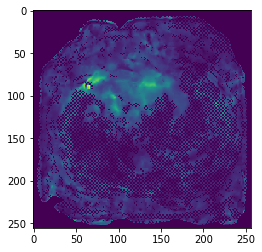

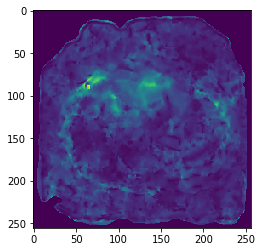

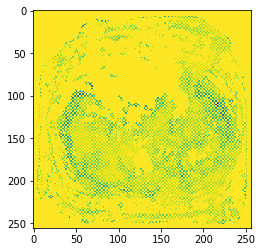

In [27]:
figure()
imshow(IMG1[0,:,:])

figure()
imshow(IMG2[0,:,:])

figure()
diffIMG = IMG1 - IMG2
imshow(diffIMG[0,:,:])

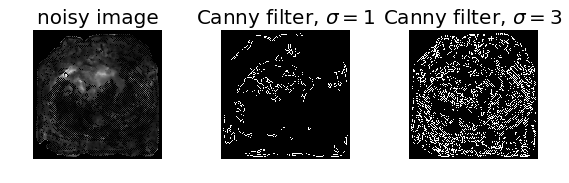

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature



# Compute the Canny filter for two values of sigma
im = IMG1[0,:,:]
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=0.2)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

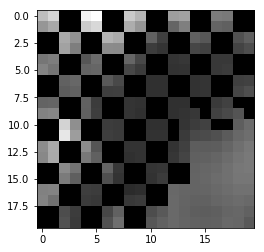

In [17]:
plt.imshow(IMG1[0,100:120,50:70],cmap='gray')


In [24]:
IMG1.max()

15633

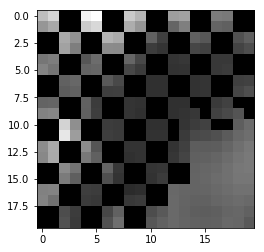

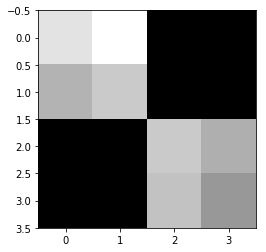

In [102]:
tmpIMG = IMG1.copy()
#tmpIMG[tmpIMG==0] = IMG1.max() + 1
plt.imshow(tmpIMG[0,100:120,50:70],cmap='gray')

figure()
plt.imshow(tmpIMG[0,100:104,50:54],cmap='gray')


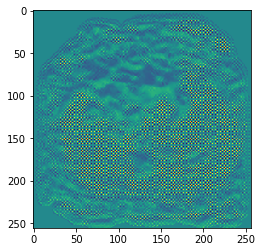

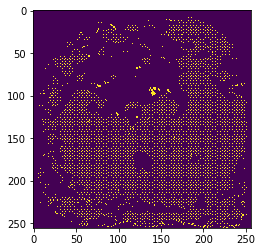

In [103]:
from skimage.feature import match_template

pat = tmpIMG[0,100:108,50:58]
result = match_template(tmpIMG[0,:,:], pat,pad_input=True)

imshow(result)

figure()
imshow(result > 0.3)

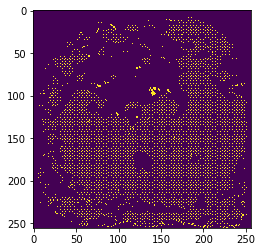

In [104]:
from skimage import morphology

mask = result > 0.3
b = morphology.remove_small_holes(mask, 1, connectivity=1)
imshow(b)

In [98]:
result.shape

(256, 256)

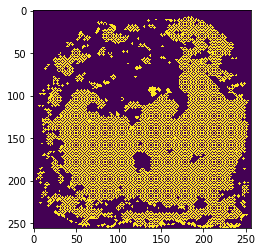

In [107]:
b = morphology.binary_dilation(mask)
#b = morphology.binary_erosion(mask)
#b = morphology.binary_dilation(b)

imshow(b)

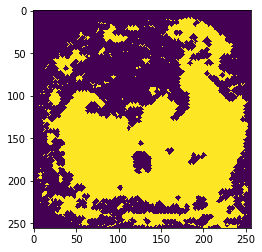

In [108]:
c = morphology.remove_small_holes(b, 2, connectivity=1)
c = morphology.binary_erosion(c)
imshow(c)

In [49]:
from scipy.ndimage.morphology import binary_fill_holes



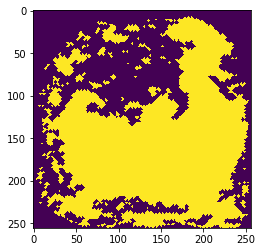

In [109]:
c = binary_fill_holes(b)
imshow(c)

In [61]:
pat

array([[5987, 6735,    0,    0, 7704, 8073,    0,    0],
       [4753, 5325,    0,    0, 6413, 6839,    0,    0],
       [   0,    0, 5333, 4610,    0,    0, 5689, 5382],
       [   0,    0, 5109, 3999,    0,    0, 4388, 4378],
       [3745, 3950,    0,    0, 2742, 3430,    0,    0],
       [4156, 3672,    0,    0, 3127, 3230,    0,    0],
       [   0,    0, 3092, 3279,    0,    0, 2812, 2309],
       [   0,    0, 2928, 3069,    0,    0, 1984, 2017]], dtype=int16)

# Define Pre-processing pipeline
Put everything together and define a pre-processing pipeline.


In [110]:
def makeUncertainMask(inFn, maskFn, thr=0.3):
    from skimage import morphology
    from scipy.ndimage.morphology import binary_fill_holes
    from skimage.feature import match_template
    import SimpleITK as sitk

    
    pat = array([[5987, 6735,    0,    0, 7704, 8073,    0,    0],
       [4753, 5325,    0,    0, 6413, 6839,    0,    0],
       [   0,    0, 5333, 4610,    0,    0, 5689, 5382],
       [   0,    0, 5109, 3999,    0,    0, 4388, 4378],
       [3745, 3950,    0,    0, 2742, 3430,    0,    0],
       [4156, 3672,    0,    0, 3127, 3230,    0,    0],
       [   0,    0, 3092, 3279,    0,    0, 2812, 2309],
       [   0,    0, 2928, 3069,    0,    0, 1984, 2017]], dtype=int16)
    
    img = sitk.ReadImage(inFn)
    IMG = sitk.GetArrayFromImage(img)
    MASK3d = np.zeros(IMG.shape)
    
    for cnt in range(IMG.shape[0]):
        # find the checkboard pattern
        result = match_template(tmpIMG[cnt,:,:], pat, pad_input=True)
        
        # make a mask
        mask = result > thr
        
        # 2 dialations followed by filling  holes
        b = morphology.binary_dilation(mask)
        c = morphology.remove_small_holes(b, 2, connectivity=1)
        d = morphology.binary_erosion(c)
        #d = morphology.binary_dilation(c)
        
        MASK3d[cnt,:,:] = binary_fill_holes(d)
        
    # save the results
    mask3d = sitk.GetImageFromArray(MASK3d)
    mask3d.SetDirection(img.GetDirection())
    mask3d.SetSpacing(img.GetSpacing())
    mask3d.SetOrigin(img.GetOrigin())
    
    sitk.WriteImage(mask3d,maskFn)
    
        
        

In [111]:
makeUncertainMask(tempDataDir + '/' + fn + '.nii', 
                  tempDataDir + '/' + 'uncertainMask' + '.nii', thr=0.3)

In [114]:
testimg = sitk.ReadImage(tempDataDir + '/' + 'uncertainMask' + '.nii')
testIMG = sitk.GetArrayFromImage(testimg)



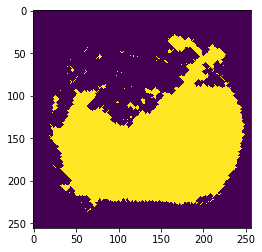

In [119]:
imshow(testIMG[1,:,:])

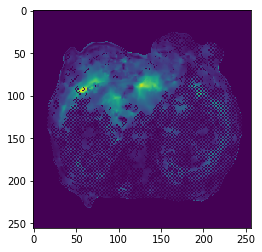

In [120]:
imshow(IMG1[1,:,:])

In [71]:
IMG.shape

(4, 256, 256)

In [72]:
b.shape

(249, 249)

In [73]:
mask.shape

(249, 249)

In [75]:
result.shape

(249, 249)

In [77]:
match_template?